In [1]:
import time
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from optbinning import OptimalBinning
from joblib import Parallel, delayed
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_parquet('train_seg3.parquet')
oos = pd.read_parquet('oos_seg3.parquet')
oot = pd.read_parquet('oot_seg3.parquet')

In [3]:
target_col = "BAD_NEXT_12M"
train[target_col] = train[target_col].astype(int)
y_train_full = train[target_col] 

In [4]:
train.shape

(442308, 37)

In [5]:
train.columns

Index(['C_GIOITINH', 'TTHONNHAN', 'NHANVIENBIDV', 'BASE_AUM', 'TUOI', 'INCOME',
       'CBAL', 'AFLIMT_AVG', 'LTV', 'N_AVG_DEPOSIT_12M', 'FLAG_SALARY_ACC',
       'FLAG_DEPOSIT', 'UTILIZATION_RATE', 'CNT_CREDIT_CARDS',
       'AMT_CASH_ADVANCE_12M', 'PCT_PAYMENT_TO_BALANCE', 'CNT_MIN_PAY_6M',
       'AVG_DAYS_PAST_DUE', 'DTI_RATIO', 'MOB', 'CNT_OTHER_PRODUCTS',
       'LIMIT_TO_INCOME', 'AMT_VAR_6M', 'CBAL_SHORTTERM_LOAN',
       'CBAL_LONGTERM_LOAN', 'CNT_DPD_30PLUS_6M', 'OCCUPATION_TYPE',
       'DURATION_MAX', 'REMAINING_DURATION_MAX', 'TIME_TO_OP_MAX', 'RATE_AVG',
       'PURCOD_MAX', 'MAX_DPD_12M', 'AVG_OD_DPD_12M', 'N_AVG_OVERDUE_CBAL_12M',
       'BAD_NEXT_12M', 'SEGMENT'],
      dtype='object')

Binning 

Skip LTV: Biến hằng số (1 unique value)
Skip AVG_OD_DPD_12M: Biến hằng số (1 unique value)

Processing: C_GIOITINH
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[M],225641,0.510145,191638,34003,0.150695,0.003517,0.000006,7.877867e-07
1,[F],216667,0.489855,183817,32850,0.151615,-0.003653,0.000007,8.183658e-07
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,442308,1.000000,375455,66853,0.151146,,0.000013,1.606152e-06


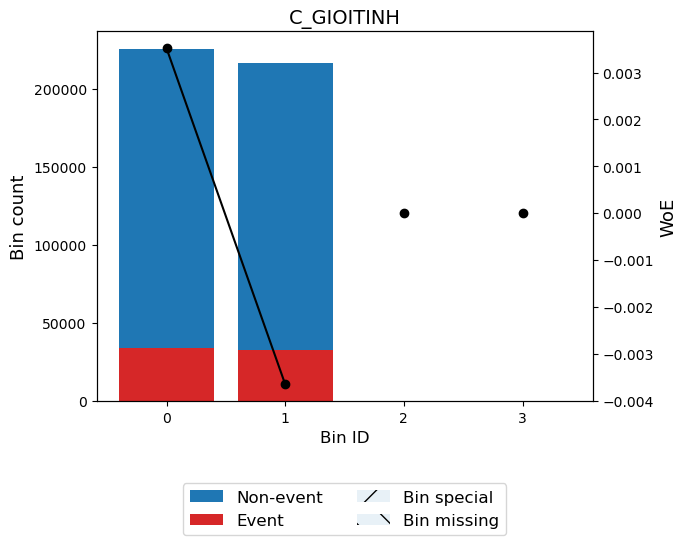


Processing: TTHONNHAN
   -> STATUS: OPTIMAL
   -> IV: 0.0171
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[Married],141526,0.319972,123525,18001,0.127192,0.200374,0.011970,0.001494
1,[Single],300782,0.680028,251930,48852,0.162417,-0.085286,0.005095,0.000637
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442308,1.000000,375455,66853,0.151146,,0.017065,0.002130


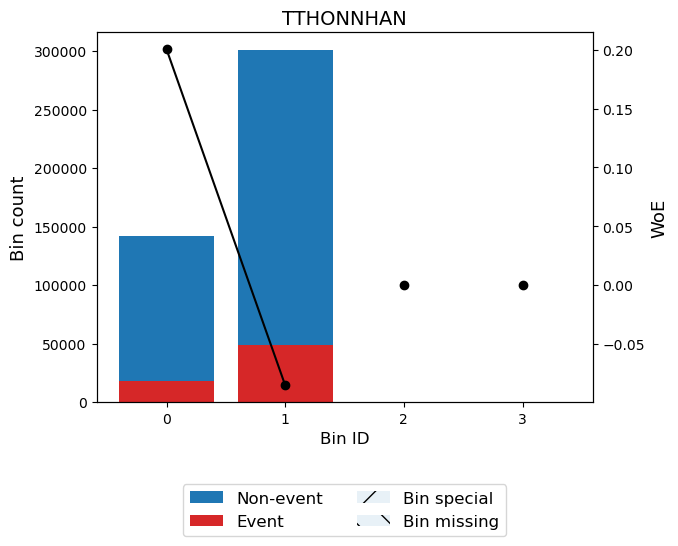


Processing: NHANVIENBIDV
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, inf)",442308,1.0,375455,66853,0.151146,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,442308,1.0,375455,66853,0.151146,,0.0,0.0


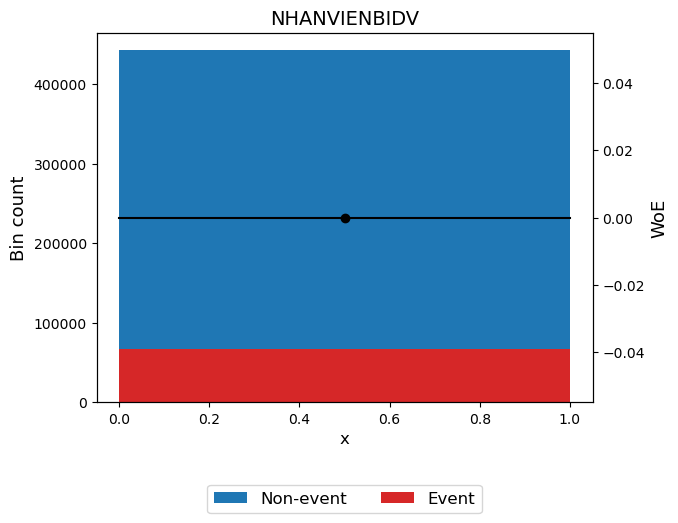


Processing: BASE_AUM
   -> STATUS: OPTIMAL
   -> IV: 0.0662
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1169353.00)",49289,0.111436,37854,11435,0.231999,-0.528585,0.037120,0.004587
1,"[1169353.00, 2042762.50)",74243,0.167854,60997,13246,0.178414,-0.198513,0.007082,0.000884
2,"[2042762.50, 3176795.50)",88578,0.200263,75495,13083,0.147700,0.02711,0.000146,0.000018
3,"[3176795.50, 5136371.00)",102163,0.230977,88695,13468,0.131829,0.159245,0.005538,0.000692
4,"[5136371.00, inf)",128035,0.289470,112414,15621,0.122006,0.24793,0.016300,0.002032
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442308,1.000000,375455,66853,0.151146,,0.066186,0.008213


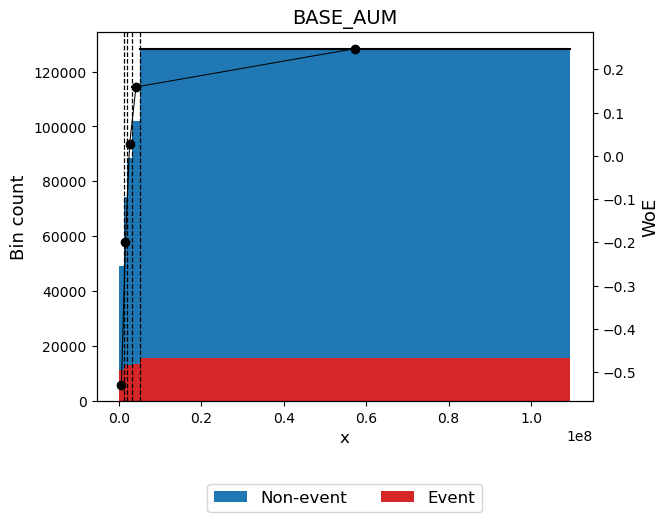


Processing: TUOI
   -> STATUS: OPTIMAL
   -> IV: 0.0795
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 24.50)",86661,0.195929,67210,19451,0.224449,-0.485719,0.054372,0.006731
1,"[24.50, 27.50)",47377,0.107113,39904,7473,0.157735,-0.050462,0.000278,0.000035
2,"[27.50, 33.50)",112036,0.253299,96336,15700,0.140134,0.088539,0.001925,0.000241
3,"[33.50, 36.50)",54460,0.123127,47414,7046,0.129379,0.180815,0.003777,0.000471
4,"[36.50, inf)",141774,0.320532,124591,17183,0.121200,0.255473,0.019113,0.002383
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442308,1.000000,375455,66853,0.151146,,0.079465,0.009860


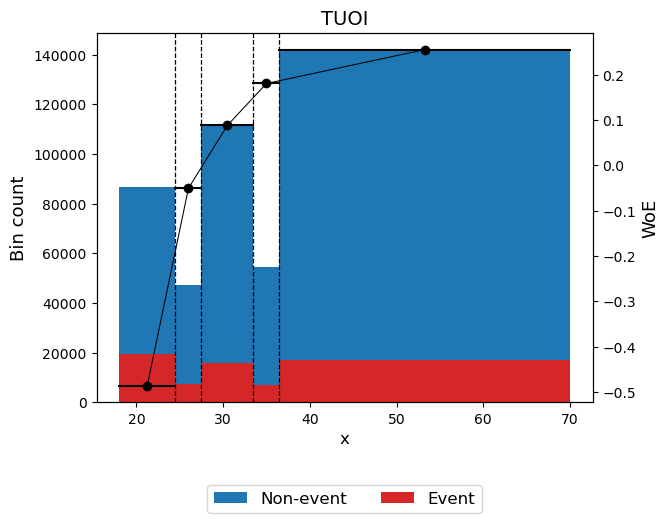


Processing: INCOME
   -> STATUS: OPTIMAL
   -> IV: 0.1903
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 15002181.00)",64394,0.145586,45726,18668,0.289903,-0.829786,0.130651,1.587839e-02
1,"[15002181.00, 20315035.00)",147563,0.333620,126547,21016,0.142421,0.069687,0.001581,1.975962e-04
2,"[20315035.00, 23881394.00)",92166,0.208375,80155,12011,0.130319,0.172497,0.005835,7.284312e-04
3,"[23881394.00, 30350278.00)",71526,0.161711,63457,8069,0.112812,0.336691,0.016268,2.023890e-03
4,"[30350278.00, inf)",44236,0.100012,40565,3671,0.082987,0.676799,0.035959,4.410983e-03
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
6,Missing,22423,0.050695,19005,3418,0.152433,-0.009996,0.000005,6.353847e-07
Totals,,442308,1.000000,375455,66853,0.151146,,0.190298,2.323992e-02


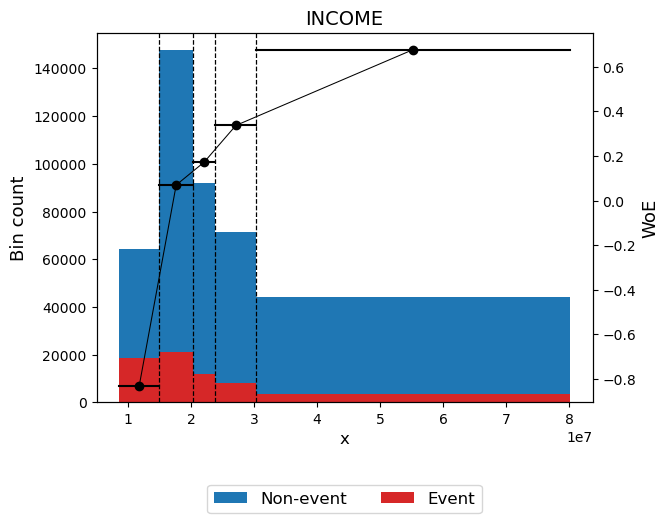


Processing: CBAL
   -> STATUS: OPTIMAL
   -> IV: 0.0297
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 139701440.00)",50176,0.113441,45193,4983,0.099310,0.479268,0.021966,0.002720
1,"[139701440.00, 182147696.00)",46684,0.105546,40493,6191,0.132615,0.15239,0.002323,0.000290
2,"[182147696.00, 335789792.00)",164476,0.371859,138621,25855,0.157196,-0.046403,0.000814,0.000102
3,"[335789792.00, 441372832.00)",73706,0.166640,61759,11947,0.162090,-0.082883,0.001178,0.000147
4,"[441372832.00, inf)",107266,0.242514,89389,17877,0.166660,-0.11616,0.003406,0.000426
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442308,1.000000,375455,66853,0.151146,,0.029687,0.003684


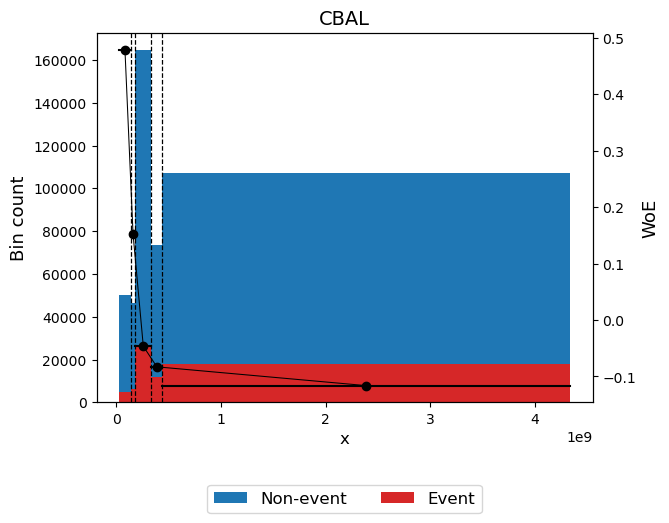


Processing: AFLIMT_AVG
   -> STATUS: OPTIMAL
   -> IV: 0.0692
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 414076288.00)",58809,0.132959,45152,13657,0.232226,-0.52986,0.044521,0.005501
1,"[414076288.00, 489102160.00)",65027,0.147017,53735,11292,0.173651,-0.165672,0.004272,0.000533
2,"[489102160.00, 562652864.00)",70694,0.159830,60551,10143,0.143478,0.06106,0.000583,0.000073
3,"[562652864.00, 740106880.00)",134785,0.304731,117015,17770,0.131840,0.159148,0.007298,0.000911
4,"[740106880.00, inf)",112993,0.255462,99002,13991,0.123822,0.231083,0.012572,0.001568
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442308,1.000000,375455,66853,0.151146,,0.069247,0.008587


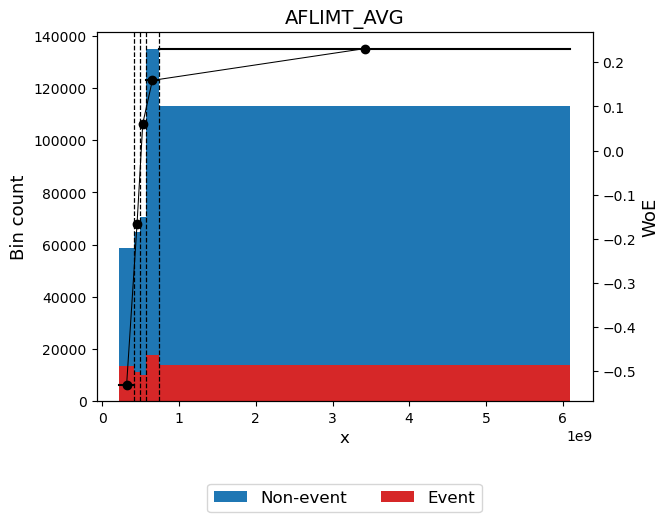


Processing: N_AVG_DEPOSIT_12M
   -> STATUS: OPTIMAL
   -> IV: 0.2259
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 286294.50)",61399,0.138815,45500,15899,0.258946,-0.674186,0.078633,0.009647
1,"[286294.50, 532695.00)",85969,0.194365,68791,17178,0.199816,-0.338199,0.024936,0.003102
2,"[532695.00, 876442.00)",101411,0.229277,85850,15561,0.153445,-0.017809,0.000073,0.000009
3,"[876442.00, 1422122.50)",113834,0.257364,101394,12440,0.109282,0.372454,0.031277,0.003887
4,"[1422122.50, inf)",79695,0.180180,73920,5775,0.072464,0.823803,0.091028,0.011067
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442308,1.000000,375455,66853,0.151146,,0.225948,0.027713


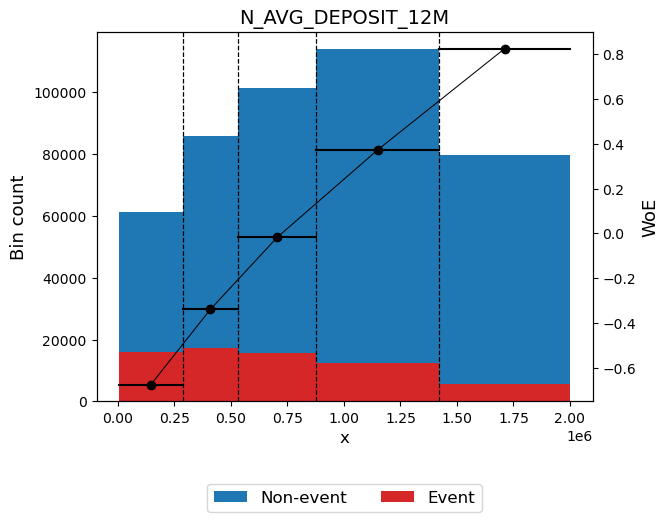


Processing: FLAG_SALARY_ACC
   -> STATUS: OPTIMAL
   -> IV: 0.1725
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",67872,0.15345,48202,19670,0.289810,-0.829337,0.137541,0.016716
1,"[0.50, inf)",374436,0.84655,327253,47183,0.126011,0.211057,0.035003,0.004367
2,Special,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442308,1.00000,375455,66853,0.151146,,0.172544,0.021084


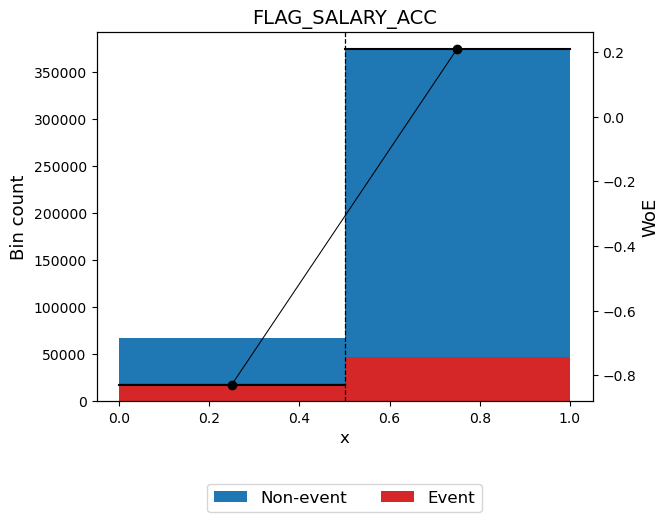


Processing: FLAG_DEPOSIT
   -> STATUS: OPTIMAL
   -> IV: 0.1542
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",279036,0.630864,226700,52336,0.187560,-0.259699,0.046499,0.005796
1,"[0.50, inf)",163272,0.369136,148755,14517,0.088913,0.601338,0.107670,0.013260
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442308,1.000000,375455,66853,0.151146,,0.154170,0.019056


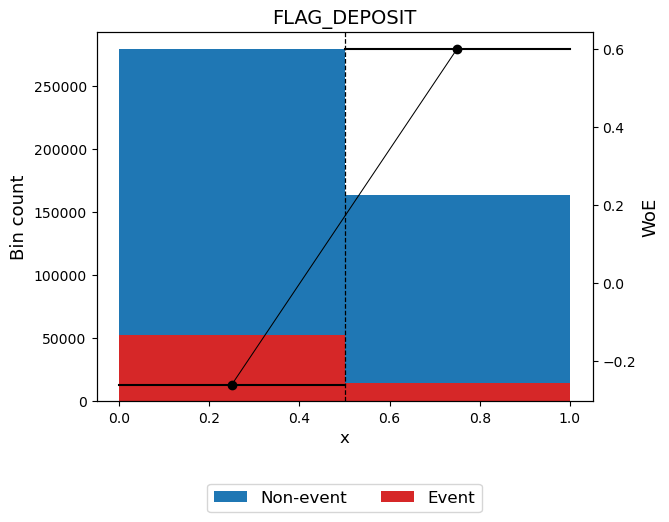


Processing: UTILIZATION_RATE
   -> STATUS: OPTIMAL
   -> IV: 0.1446
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.32)",101763,0.230073,92584,9179,0.090200,0.585556,0.063996,0.007887
1,"[0.32, 0.42)",73887,0.167049,65335,8552,0.115744,0.30772,0.014184,0.001766
2,"[0.42, 0.56)",92592,0.209338,78966,13626,0.147162,0.031395,0.000204,0.000026
3,"[0.56, 0.74)",122403,0.276737,99117,23286,0.190240,-0.277194,0.023374,0.002912
4,"[0.74, inf)",51663,0.116803,39453,12210,0.236339,-0.552788,0.042874,0.005292
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442308,1.000000,375455,66853,0.151146,,0.144631,0.017883


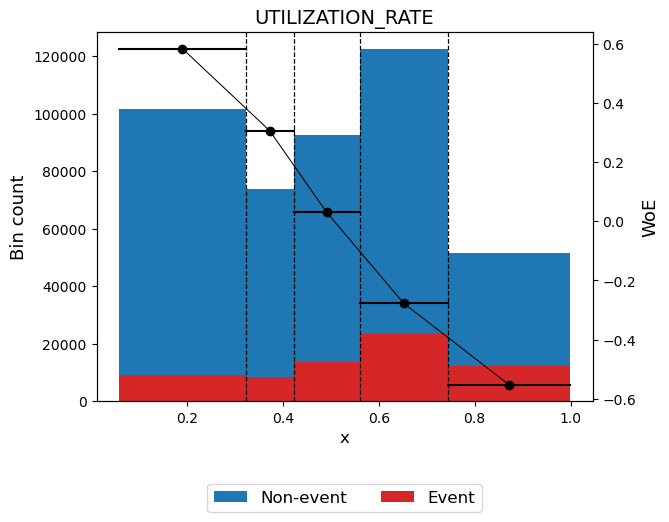


Processing: CNT_CREDIT_CARDS
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",98928,0.223663,84057,14871,0.150321,0.00644,9.254394e-06,1.156797e-06
1,"[0.50, 1.50)",148186,0.335029,125797,22389,0.151087,0.000457,7.004663e-08,8.755828e-09
2,"[1.50, 2.50)",111069,0.251112,94236,16833,0.151554,-0.003181,2.544432e-06,3.180539e-07
3,"[2.50, inf)",84125,0.190196,71365,12760,0.151679,-0.00415,3.280655e-06,4.100816e-07
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
Totals,,442308,1.000000,375455,66853,0.151146,,1.514953e-05,1.893689e-06


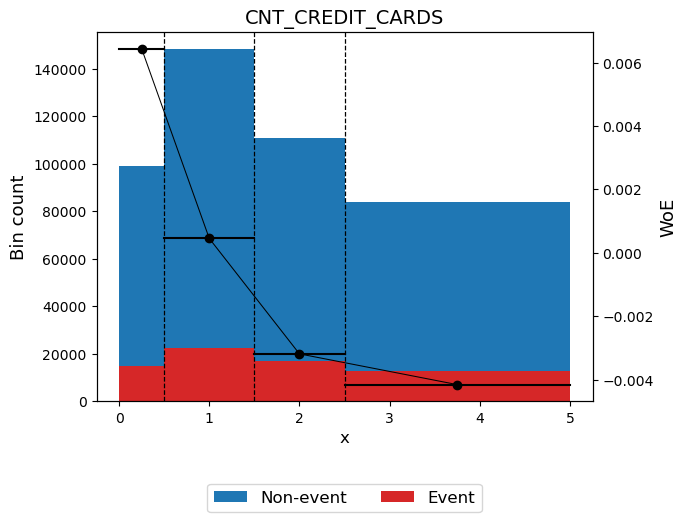


Processing: AMT_CASH_ADVANCE_12M
   -> STATUS: OPTIMAL
   -> IV: 0.0110
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 30980934.00)",374590,0.846899,320190,54400,0.145225,0.046908,0.001833,0.000229
1,"[30980934.00, inf)",67718,0.153101,55265,12453,0.183895,-0.235464,0.009202,0.001148
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442308,1.000000,375455,66853,0.151146,,0.011035,0.001377


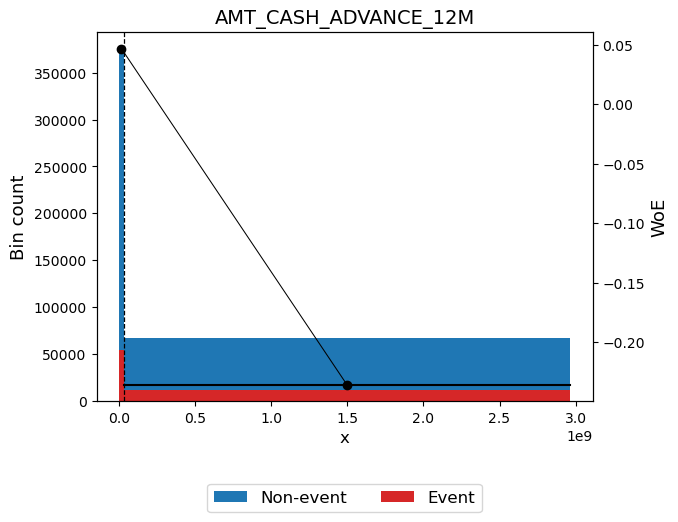


Processing: PCT_PAYMENT_TO_BALANCE
   -> STATUS: OPTIMAL
   -> IV: 0.0311
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.78)",80407,0.181790,65461,14946,0.185879,-0.248632,0.012236,1.525592e-03
1,"[0.78, 0.98)",85824,0.194037,71656,14168,0.165082,-0.104751,0.002208,2.758490e-04
2,"[0.98, 1.18)",102328,0.231350,86793,15535,0.151816,-0.005212,0.000006,7.870092e-07
3,"[1.18, 1.38)",85668,0.193684,73882,11786,0.137578,0.109914,0.002251,2.812758e-04
4,"[1.38, inf)",88081,0.199140,77663,10418,0.118277,0.283201,0.014448,1.799961e-03
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,442308,1.000000,375455,66853,0.151146,,0.031149,3.883466e-03


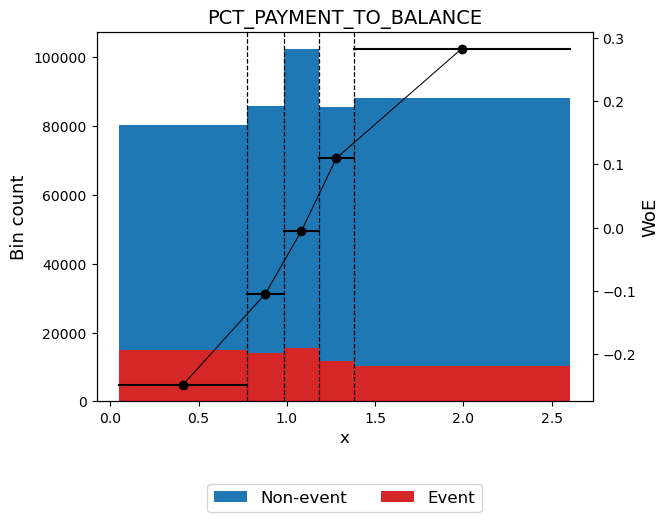


Processing: CNT_MIN_PAY_6M
   -> STATUS: OPTIMAL
   -> IV: 0.0642
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",301888,0.682529,263022,38866,0.128743,0.186475,0.022224,0.002774
1,"[0.50, 1.50)",56936,0.128725,46422,10514,0.184663,-0.240577,0.008090,0.001009
2,"[1.50, inf)",83484,0.188746,66011,17473,0.209298,-0.396478,0.033918,0.004212
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442308,1.000000,375455,66853,0.151146,,0.064232,0.007995


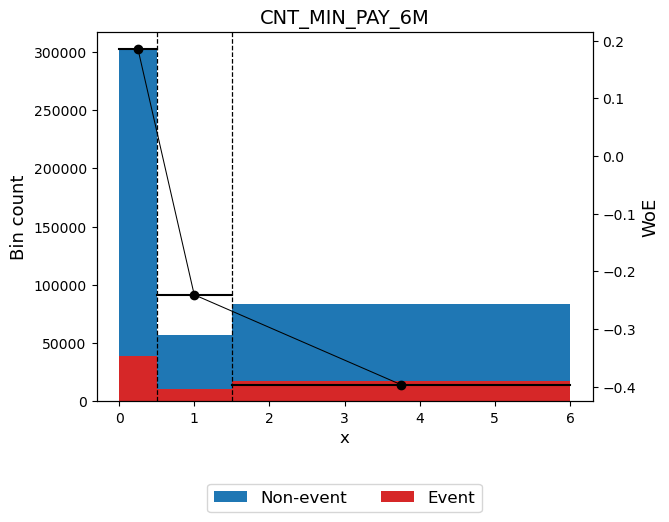


Processing: AVG_DAYS_PAST_DUE
   -> STATUS: OPTIMAL
   -> IV: 0.0595
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",304084,0.687494,264640,39444,0.129714,0.177846,0.020424,0.002550
1,"[0.50, 4.50)",88462,0.200001,71574,16888,0.190907,-0.281514,0.017449,0.002174
2,"[4.50, inf)",49762,0.112505,39241,10521,0.211426,-0.409294,0.021635,0.002686
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442308,1.000000,375455,66853,0.151146,,0.059507,0.007409


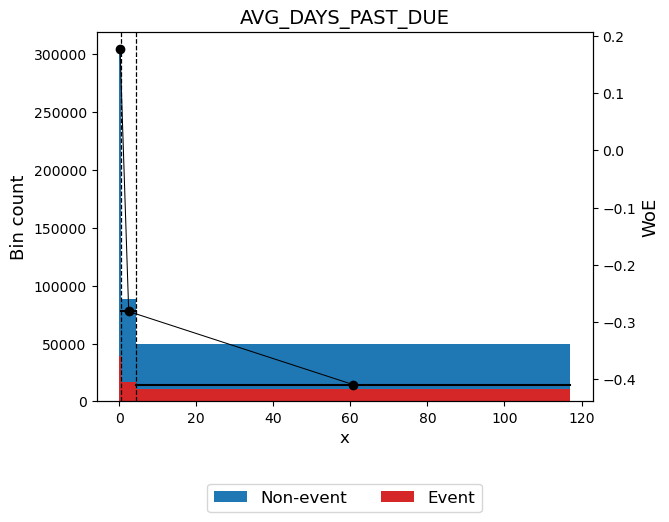


Processing: DTI_RATIO
   -> STATUS: OPTIMAL
   -> IV: 0.1686
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.60)",45291,0.102397,41588,3703,0.081760,0.693026,0.038378,0.004703
1,"[0.60, 1.00)",114126,0.258024,102665,11461,0.100424,0.466879,0.047624,0.005900
2,"[1.00, 1.63)",161703,0.365589,137028,24675,0.152595,-0.011248,0.000046,0.000006
3,"[1.63, 2.00)",58494,0.132247,47231,11263,0.192550,-0.292115,0.012467,0.001553
4,"[2.00, inf)",62694,0.141743,46943,15751,0.251236,-0.633612,0.070063,0.008614
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442308,1.000000,375455,66853,0.151146,,0.168578,0.020776


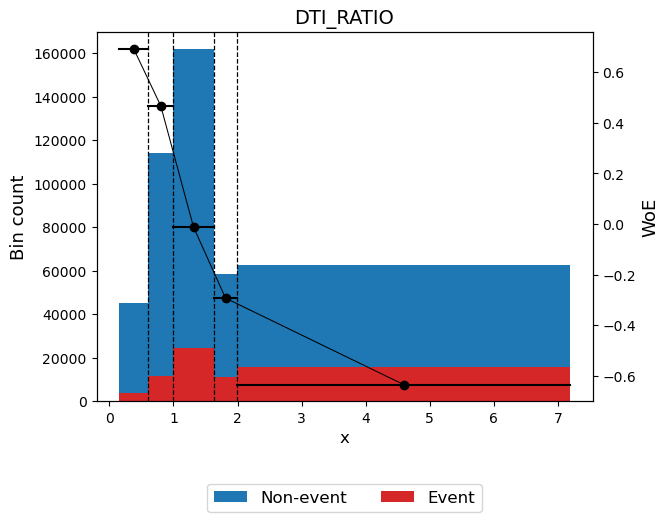


Processing: MOB
   -> STATUS: OPTIMAL
   -> IV: 0.0002
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 20.50)",58351,0.131924,49615,8736,0.149715,0.011198,0.000016,0.000002
1,"[20.50, 43.50)",88541,0.200180,75284,13257,0.149727,0.011099,0.000025,0.000003
2,"[43.50, 85.50)",163276,0.369145,138721,24555,0.150390,0.005907,0.000013,0.000002
3,"[85.50, inf)",132140,0.298751,111835,20305,0.153663,-0.019485,0.000114,0.000014
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442308,1.000000,375455,66853,0.151146,,0.000168,0.000021


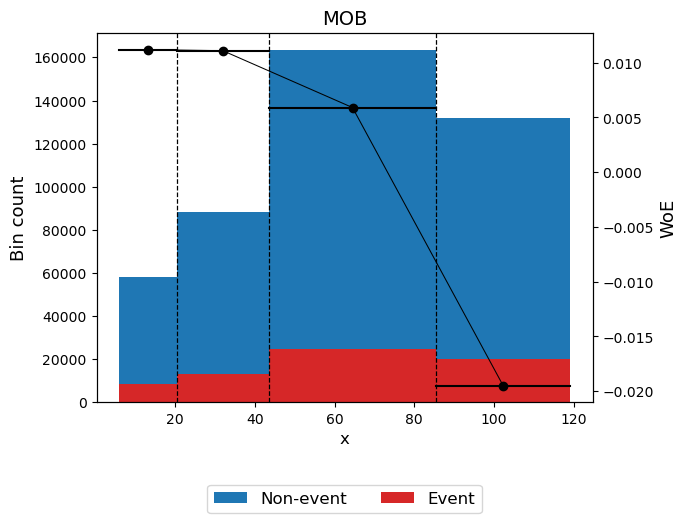


Processing: CNT_OTHER_PRODUCTS
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",265429,0.600100,225160,40269,0.151713,-0.004413,0.000012,0.000001
1,"[0.50, 1.50)",110339,0.249462,93746,16593,0.150382,0.005966,0.000009,0.000001
2,"[1.50, inf)",66540,0.150438,56549,9991,0.150150,0.00778,0.000009,0.000001
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442308,1.000000,375455,66853,0.151146,,0.000030,0.000004


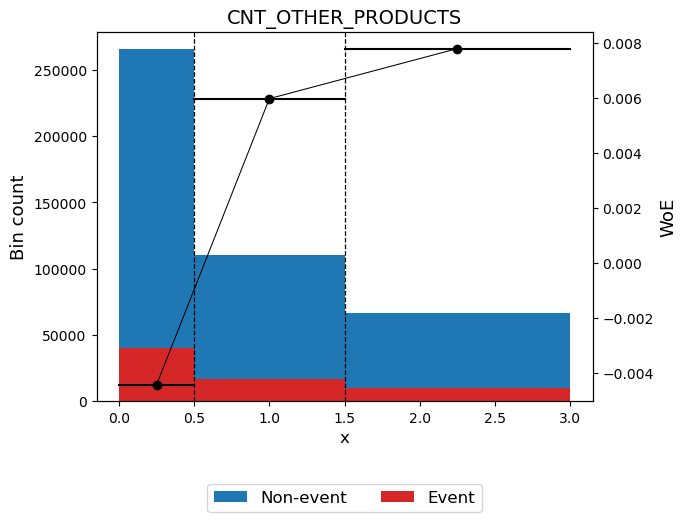


Processing: LIMIT_TO_INCOME
   -> STATUS: OPTIMAL
   -> IV: 0.0604
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 26.50)",76169,0.172208,65894,10275,0.134897,0.132691,0.002894,0.000361
1,"[26.50, 28.09)",50709,0.114646,43764,6945,0.136958,0.115147,0.001460,0.000182
2,"[28.09, 30.71)",86518,0.195606,74573,11945,0.138064,0.105823,0.002111,0.000264
3,"[30.71, 36.00)",182103,0.411711,156158,25945,0.142474,0.069247,0.001927,0.000241
4,"[36.00, inf)",46809,0.105829,35066,11743,0.250871,-0.631668,0.051960,0.006389
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442308,1.000000,375455,66853,0.151146,,0.060351,0.007437


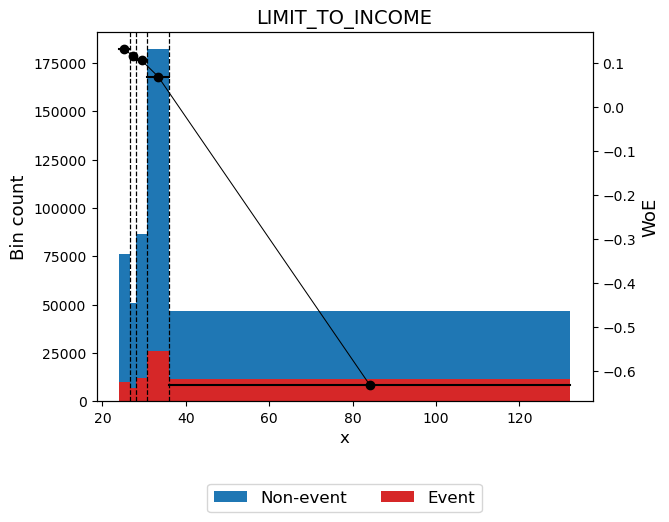


Processing: AMT_VAR_6M
   -> STATUS: OPTIMAL
   -> IV: 0.0001
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -0.24)",51729,0.116952,44041,7688,0.148621,0.019818,0.000046,0.000006
1,"[-0.24, -0.08)",98429,0.222535,83653,14776,0.150118,0.008031,0.000014,0.000002
2,"[-0.08, inf)",292150,0.660513,247761,44389,0.151939,-0.00617,0.000025,0.000003
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442308,1.000000,375455,66853,0.151146,,0.000085,0.000011


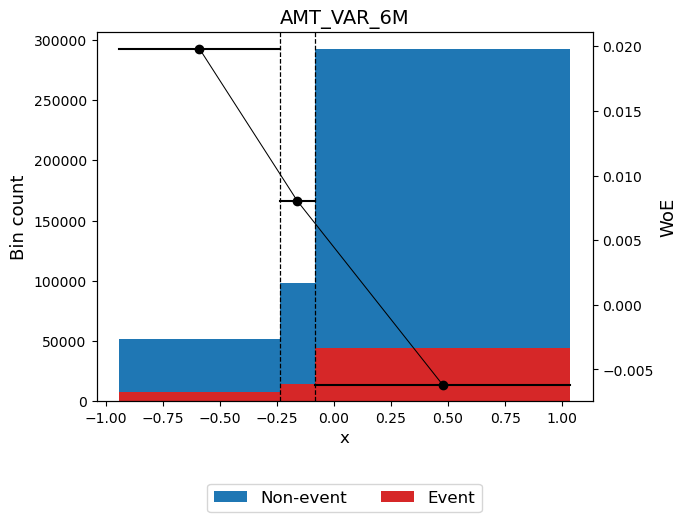


Processing: CBAL_SHORTTERM_LOAN
   -> STATUS: OPTIMAL
   -> IV: 0.0071
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 81431004.00)",146231,0.330609,125968,20263,0.138568,0.101589,0.003292,0.000411
1,"[81431004.00, 126393644.00)",71323,0.161252,60924,10399,0.145801,0.042275,0.000284,0.000035
2,"[126393644.00, 168152488.00)",53063,0.119968,44756,8307,0.156550,-0.041515,0.000210,0.000026
3,"[168152488.00, 329591168.00)",113147,0.255810,95109,18038,0.159421,-0.063099,0.001041,0.000130
4,"[329591168.00, inf)",58544,0.132360,48698,9846,0.168181,-0.12707,0.002233,0.000279
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442308,1.000000,375455,66853,0.151146,,0.007060,0.000882


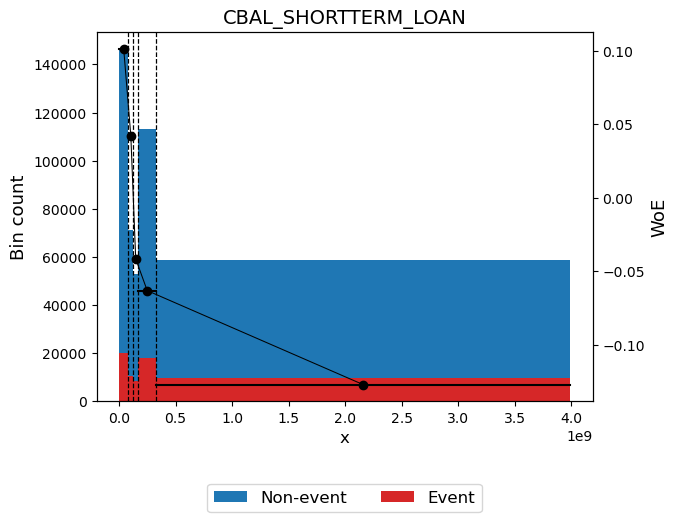


Processing: CBAL_LONGTERM_LOAN
   -> STATUS: OPTIMAL
   -> IV: 0.0071
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 29016791.00)",52664,0.119066,45410,7254,0.137741,0.108537,0.001350,0.000169
1,"[29016791.00, 86582472.00)",102101,0.230837,87847,14254,0.139607,0.092917,0.001929,0.000241
2,"[86582472.00, 138022128.00)",78256,0.176926,66831,11425,0.145995,0.040721,0.000289,0.000036
3,"[138022128.00, 182220592.00)",52550,0.118809,44266,8284,0.157640,-0.049752,0.000299,0.000037
4,"[182220592.00, inf)",156737,0.354362,131101,25636,0.163561,-0.093672,0.003212,0.000401
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442308,1.000000,375455,66853,0.151146,,0.007080,0.000885


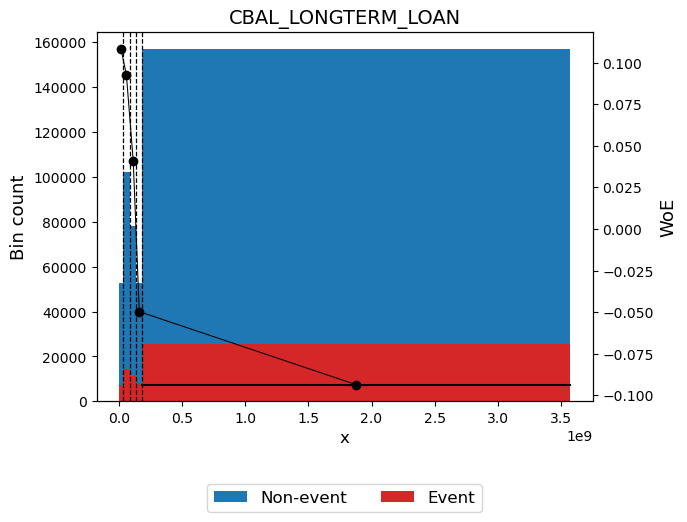


Processing: CNT_DPD_30PLUS_6M
   -> STATUS: OPTIMAL
   -> IV: 0.0260
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",380810,0.860961,326586,54224,0.142391,0.069927,0.004108,0.000513
1,"[0.50, inf)",61498,0.139039,48869,12629,0.205356,-0.372495,0.021883,0.002720
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442308,1.000000,375455,66853,0.151146,,0.025991,0.003233


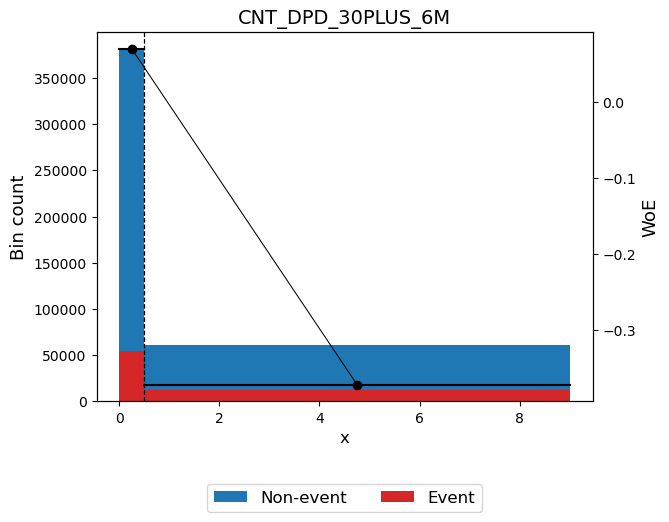


Processing: OCCUPATION_TYPE
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[3],88663,0.200455,75388,13275,0.149724,0.011123,2.470489e-05,3.088095e-06
1,[4],44369,0.100312,37677,6692,0.150826,0.002495,6.237047e-07,7.796306e-08
2,[1],176476,0.398989,149775,26701,0.151301,-0.001209,5.837250e-07,7.296562e-08
3,[2],132800,0.300243,112615,20185,0.151995,-0.006607,1.313769e-05,1.642208e-06
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
Totals,,442308,1.000000,375455,66853,0.151146,,3.905000e-05,4.881232e-06


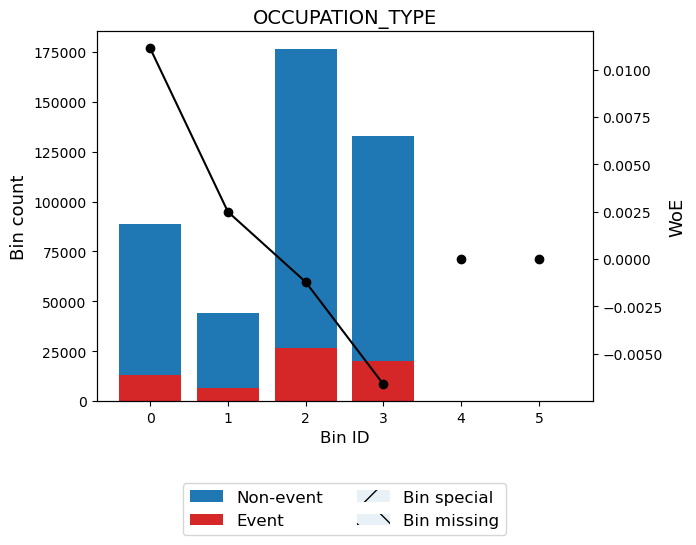


Processing: DURATION_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 48.00)",145094,0.328038,123288,21806,0.150289,0.006695,0.000015,1.833926e-06
1,"[48.00, inf)",297214,0.671962,252167,45047,0.151564,-0.003257,0.000007,8.921842e-07
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,442308,1.000000,375455,66853,0.151146,,0.000022,2.726111e-06


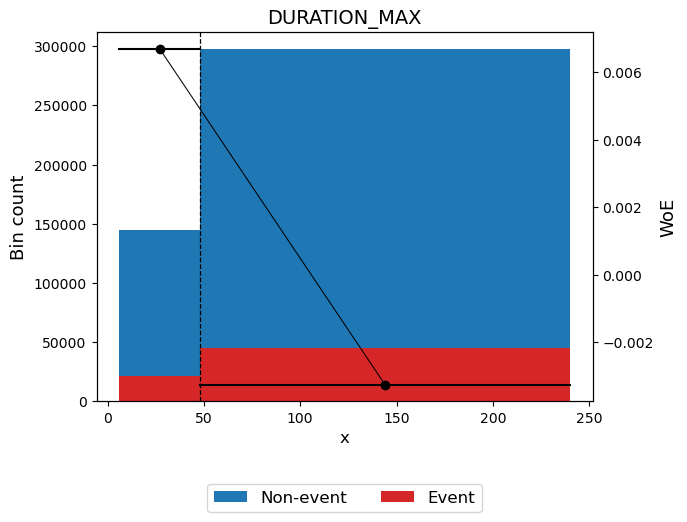


Processing: REMAINING_DURATION_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0002
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 11.50)",64451,0.145715,54941,9510,0.147554,0.028274,1.153386e-04,1.441684e-05
1,"[11.50, 41.50)",205533,0.464683,174505,31028,0.150964,0.001421,9.377458e-07,1.172182e-07
2,"[41.50, inf)",172324,0.389602,146009,26315,0.152707,-0.012113,5.740896e-05,7.176076e-06
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
Totals,,442308,1.000000,375455,66853,0.151146,,1.736853e-04,2.171014e-05


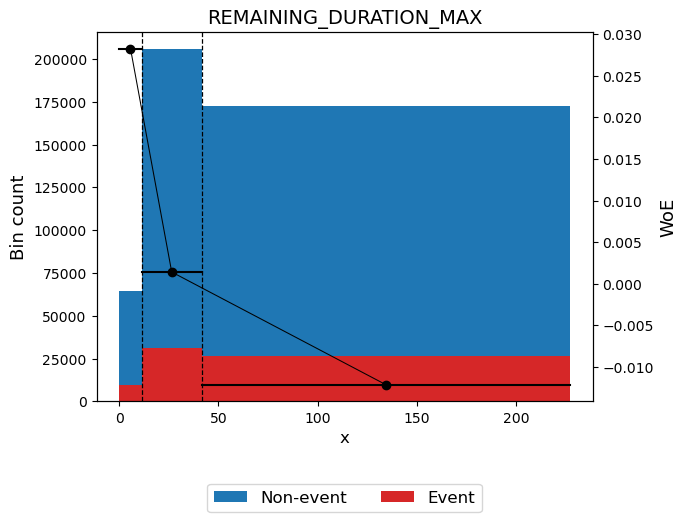


Processing: TIME_TO_OP_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0002
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 8.50)",51526,0.116493,43970,7556,0.146644,0.035523,0.000145,1.814758e-05
1,"[8.50, 14.50)",51568,0.116588,43808,7760,0.150481,0.005192,0.000003,3.920960e-07
2,"[14.50, inf)",339214,0.766918,287677,51537,0.151931,-0.006104,0.000029,3.579551e-06
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,442308,1.000000,375455,66853,0.151146,,0.000177,2.211923e-05


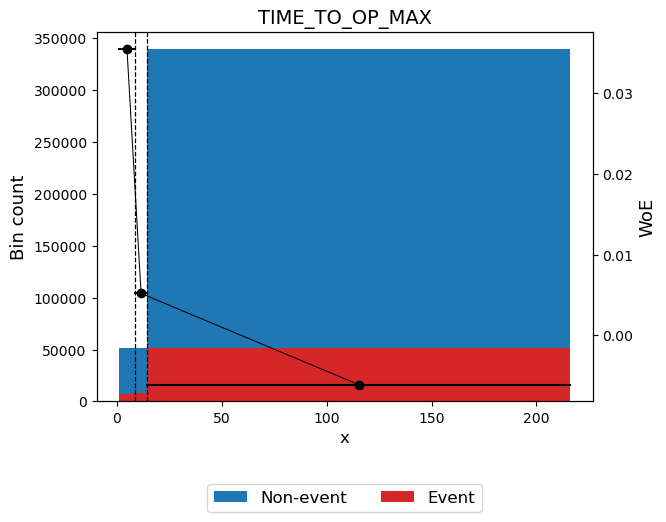


Processing: RATE_AVG
   -> STATUS: OPTIMAL
   -> IV: 0.0708
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 6.63)",58614,0.132519,53005,5609,0.095694,0.520371,0.029804,0.003684
1,"[6.63, 8.51)",119434,0.270025,104277,15157,0.126907,0.202946,0.010353,0.001292
2,"[8.51, 9.97)",112055,0.253342,94770,17285,0.154255,-0.024029,0.000148,0.000018
3,"[9.97, 12.02)",107115,0.242173,87773,19342,0.180572,-0.213167,0.011840,0.001477
4,"[12.02, inf)",45090,0.101943,35630,9460,0.209803,-0.399527,0.018620,0.002312
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442308,1.000000,375455,66853,0.151146,,0.070765,0.008784


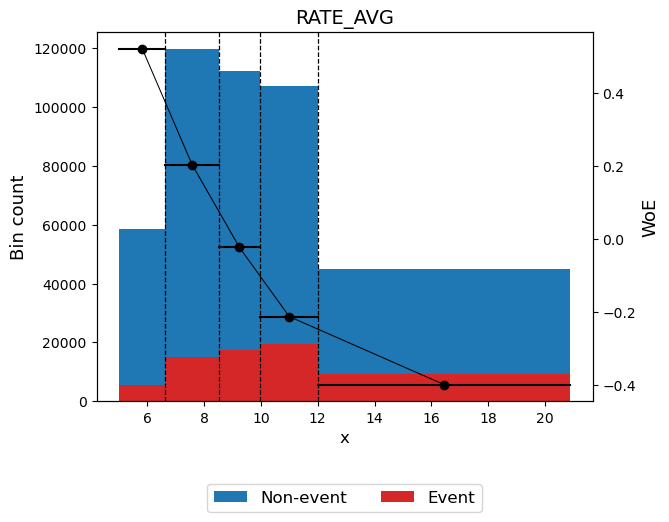


Processing: PURCOD_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[2, 9]",88165,0.199329,74959,13206,0.149787,0.010628,2.242999e-05,2.803735e-06
1,[6],221197,0.500097,187766,33431,0.151137,0.00007,2.481939e-09,3.102423e-10
2,"[3, 1]",132946,0.300573,112730,20216,0.152062,-0.007121,1.528057e-05,1.910067e-06
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
Totals,,442308,1.000000,375455,66853,0.151146,,3.771304e-05,4.714113e-06


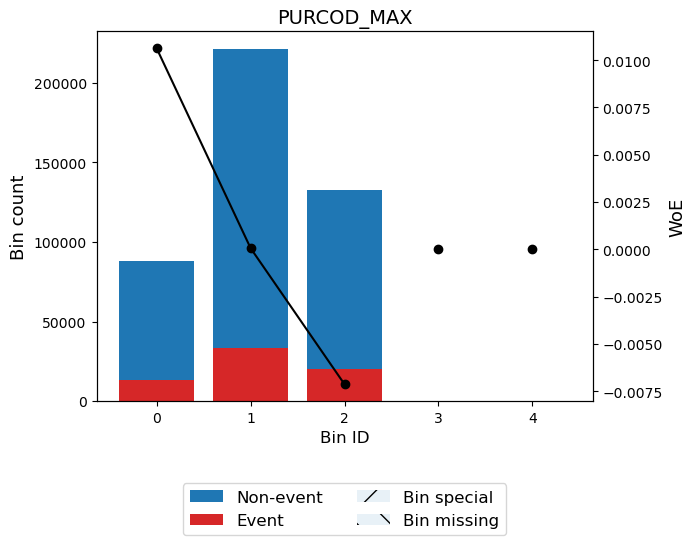


Processing: MAX_DPD_12M
   -> STATUS: OPTIMAL
   -> IV: 0.9958
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1.50)",58467,0.132186,57485,982,0.016796,2.344046,0.324460,0.033252
1,"[1.50, 9.50)",132674,0.299958,127283,5391,0.040633,1.43604,0.371030,0.042764
2,"[9.50, 19.50)",83293,0.188314,68886,14407,0.172968,-0.160904,0.005154,0.000644
3,"[19.50, 46.50)",101653,0.229824,77042,24611,0.242108,-0.584485,0.095236,0.011738
4,"[46.50, inf)",66221,0.149717,44759,21462,0.324097,-0.990634,0.199930,0.024017
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442308,1.000000,375455,66853,0.151146,,0.995809,0.112414


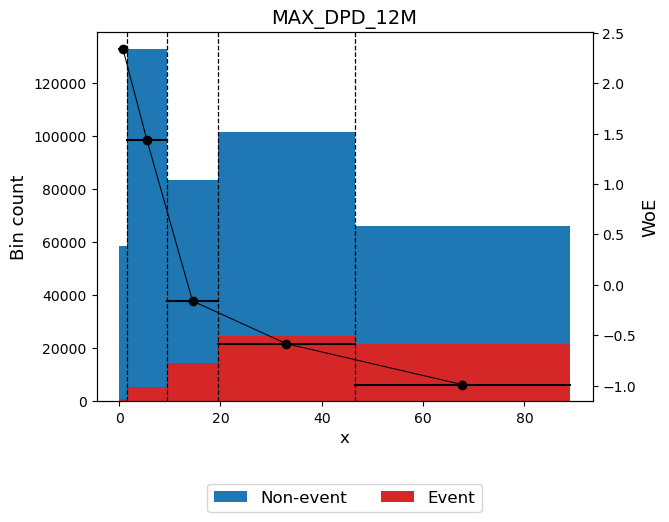


Processing: N_AVG_OVERDUE_CBAL_12M
   -> STATUS: OPTIMAL
   -> IV: 0.1366
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 56593224.00)",55539,0.125566,52621,2918,0.052540,1.166574,0.112580,0.013325
1,"[56593224.00, 81365404.00)",44869,0.101443,39392,5477,0.122066,0.247363,0.005687,0.000709
2,"[81365404.00, 133197972.00)",109466,0.247488,91360,18106,0.165403,-0.107078,0.002945,0.000368
3,"[133197972.00, 220686416.00)",131950,0.298322,109371,22579,0.171118,-0.147917,0.006869,0.000858
4,"[220686416.00, inf)",100484,0.227181,82711,17773,0.176874,-0.18797,0.008563,0.001069
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442308,1.000000,375455,66853,0.151146,,0.136644,0.016329


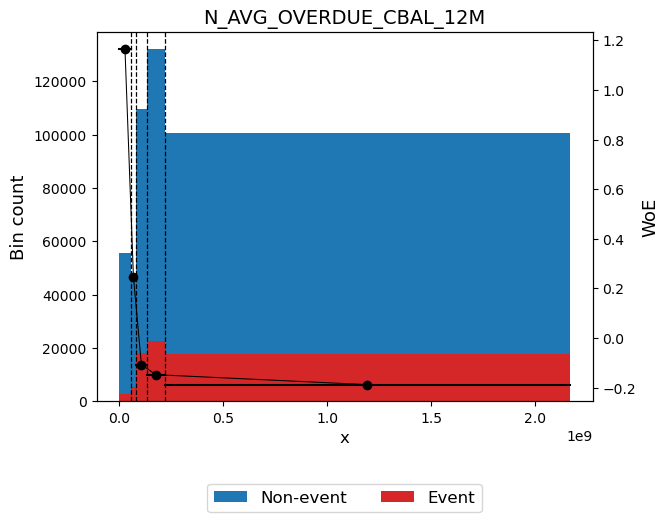

In [6]:
forced_cat_cols = [
    "C_GIOITINH", "TTHONNHAN", "PURCOD_MAX", 
    "OCCUPATION_TYPE", "MAX_NHOMNOCIC"
]

exclude_cols = [
    "SEGMENT", "SAMPLE_TYPE", target_col
]

candidates = [c for c in train.columns if c not in exclude_cols]

# --- BƯỚC LỌC THÔ (PRE-FILTER) ---
clean_candidates = []
for c in candidates:
    # 1. Loại biến chỉ có 1 giá trị duy nhất (Constant)
    if train[c].nunique() <= 1:
        print(f"Skip {c}: Biến hằng số (1 unique value)")
        continue
        
    # 2. Loại biến 100% Missing
    if train[c].isnull().all():
        print(f"Skip {c}: Biến 100% Null")
        continue
        
    clean_candidates.append(c)

# Cập nhật lại list cần chạy
candidates = clean_candidates

binning_results = {}

for feature in candidates:
    print(f"\nProcessing: {feature}")

    try:
        # Xác định loại biến
        is_categorical = feature in forced_cat_cols or \
                         (not pd.api.types.is_numeric_dtype(train[feature]))

        x_clean = train[feature].values 
        dtype_input = "numerical"
        
        if is_categorical:
            dtype_input = "categorical"
            x_clean = train[feature].astype(str).values

        optb = OptimalBinning(
            name=feature,
            dtype=dtype_input,
            solver="mip",
            monotonic_trend='auto_asc_desc',
            max_n_bins=5,
            prebinning_method='cart',
            divergence='iv',
            min_n_bins=2,
            min_bin_size=0.1
        )

        optb.fit(x_clean, train[target_col])

        print(f"   -> STATUS: {optb.status}")

        if optb.status in ["OPTIMAL", "FEASIBLE"]:
            optb.binning_table.build()
            # Lưu lại kết quả
            binning_results[feature] = optb
 
            # IV
            print(f"   -> IV: {optb.binning_table.iv:.4f}")

            # Hiển thị bảng
            print("   -> Chi tiết các Bin:")
            display(optb.binning_table.build())

            # Vẽ WOE
            try:
                # 1. Xóa plot cũ
                plt.close('all')
                
                # 2. Xử lý tiêu đề cho gọn
                plot_title = f"Var: {feature} | IV: {optb.binning_table.iv:.4f}"
                
                # 3. Vẽ hình dựa trên loại biến
                if dtype_input == "numerical":
                    # Biến số: Vẽ style="actual" để thấy xu hướng tăng/giảm rõ ràng
                    optb.binning_table.plot(metric="woe", style="actual", add_special=True)
                else:
                    # Biến category: KHÔNG dùng style="actual", chỉ vẽ cột mặc định
                    optb.binning_table.plot(metric="woe", add_special=True)
                
                # 4. Hiển thị
                plt.show()
                plt.close() # Đóng ngay

            except Exception as e_plot:
                print(f"   -> Lỗi vẽ hình: {e_plot}")

        else:
            print("   -> Skip: Không tạo được bin tối ưu")

    except Exception as e:
        print(f"   -> ERROR: {e}")

TỔNG HỢP KẾT QUẢ VÀ KIỂM TRA CHẤT LƯỢNG BIẾN

In [7]:
summary_data = []

for feature, optb in binning_results.items():
    # 1. Lấy bảng binning chi tiết
    bt = optb.binning_table.build()
    
    # --- SỬA LỖI TẠI ĐÂY ---
    # Chuyển cột Bin sang string trước khi so sánh để tránh lỗi với biến Category (list)
    bt_clean = bt[bt['Bin'].astype(str) != 'Totals']
    
    # Chỉ xét các bin có dữ liệu (Count > 0)
    valid_bins = bt_clean[bt_clean['Count'] > 0]
    
    if valid_bins.empty:
        continue

    # 2. Tính toán các chỉ số
    iv_value = optb.binning_table.iv
    min_bin_pct = valid_bins['Count (%)'].min() # Tỷ lệ % của bin nhỏ nhất
    max_bin_pct = valid_bins['Count (%)'].max() # Tỷ lệ % của bin lớn nhất
    n_bins = len(valid_bins)

    # 3. Xác định xu hướng (Trend) với PD (Event Rate)
    trend_observed = "N/A (Categorical)"
    
    if optb.dtype == "numerical":
        # Lấy các bin số thực (loại bỏ Special/Missing)
        # Convert sang str để so sánh an toàn
        mask_special = valid_bins['Bin'].astype(str).isin(['Special', 'Missing'])
        numeric_bins = valid_bins[~mask_special]
        
        if len(numeric_bins) >= 2:
            first_er = numeric_bins.iloc[0]['Event rate']
            last_er = numeric_bins.iloc[-1]['Event rate']
            
            if last_er > first_er:
                trend_observed = "Tăng (Thuận)"
            elif last_er < first_er:
                trend_observed = "Giảm (Nghịch)"
            else:
                trend_observed = "Không rõ (Flat)"

    # 4. Gắn cờ cảnh báo (Flag Issues)
    issues = []
    if iv_value < 0.02: 
        issues.append("Weak IV")
    if min_bin_pct < 0.05: 
        issues.append("Small Bin (<5%)")
    if optb.status != "OPTIMAL":
        issues.append(f"Status: {optb.status}")
    if n_bins < 2:
        issues.append("Single Bin")

    # 5. Đưa vào danh sách tổng hợp
    summary_data.append({
        "Variable": feature,
        "IV": iv_value,
        "Trend_PD": trend_observed,
        "Min_Bin_Pct": min_bin_pct,
        "Max_Bin_Pct": max_bin_pct,
        "Num_Bins": n_bins,
        "Quality_Check": ", ".join(issues) if issues else "PASS"
    })

# --- HIỂN THỊ KẾT QUẢ ---
if summary_data:
    df_summary = pd.DataFrame(summary_data)
    
    # Sắp xếp theo IV giảm dần
    df_summary = df_summary.sort_values("IV", ascending=False).reset_index(drop=True)
    
    # Hiển thị full danh sách
    pd.set_option('display.max_rows', None)
    
    print(f"Tổng số biến đạt yêu cầu: {len(df_summary)}")
    
    # Hiển thị bảng bình thường với format số đẹp
    display(df_summary.style.format({
        "IV": "{:.4f}",
        "Min_Bin_Pct": "{:.2%}",
        "Max_Bin_Pct": "{:.2%}"
    }))
    
else:
    print("Không có biến nào được xử lý thành công.")

Tổng số biến đạt yêu cầu: 33


,Variable,IV,Trend_PD,Min_Bin_Pct,Max_Bin_Pct,Num_Bins,Quality_Check
0,MAX_DPD_12M,0.9958,Tăng (Thuận),13.22%,100.00%,6,PASS
1,N_AVG_DEPOSIT_12M,0.2259,Giảm (Nghịch),13.88%,100.00%,6,PASS
2,INCOME,0.1903,Giảm (Nghịch),5.07%,100.00%,7,PASS
3,FLAG_SALARY_ACC,0.1725,Giảm (Nghịch),15.34%,100.00%,3,PASS
4,DTI_RATIO,0.1686,Tăng (Thuận),10.24%,100.00%,6,PASS
5,FLAG_DEPOSIT,0.1542,Giảm (Nghịch),36.91%,100.00%,3,PASS
6,UTILIZATION_RATE,0.1446,Tăng (Thuận),11.68%,100.00%,6,PASS
7,N_AVG_OVERDUE_CBAL_12M,0.1366,Tăng (Thuận),10.14%,100.00%,6,PASS
8,TUOI,0.0795,Giảm (Nghịch),10.71%,100.00%,6,PASS
9,RATE_AVG,0.0708,Tăng (Thuận),10.19%,100.00%,6,PASS


Multivariate ana

LOẠI BỎ BIẾN YẾU

In [8]:
# 1. Xác định danh sách biến cần loại (những biến không PASS)
# Lấy từ bảng df_summary đã tạo ở bước trước
drop_list = df_summary[df_summary['Quality_Check'] != 'PASS']['Variable'].tolist()

if drop_list:
    print(f"-> Phát hiện {len(drop_list)} biến yếu/lỗi cần loại bỏ.")
    
    # 2. Xóa khỏi dictionary lưu trữ kết quả
    for var in drop_list:
        if var in binning_results:
            del binning_results[var] # Lệnh xóa trực tiếp khỏi bộ nhớ
            
    print(f"-> Đã xóa thành công: {drop_list}")
else:
    print("-> Tuyệt vời! Tất cả các biến đều đạt chuẩn, không cần xóa gì cả.")

# 3. Cập nhật lại danh sách biến tốt để dùng cho Bước 4
final_vars_step3 = list(binning_results.keys())

print(f"\n>>> SỐ LƯỢNG BIẾN CÒN LẠI ĐỂ CHẠY ĐA CỘNG TUYẾN: {len(final_vars_step3)}")

-> Phát hiện 15 biến yếu/lỗi cần loại bỏ.
-> Đã xóa thành công: ['TTHONNHAN', 'AMT_CASH_ADVANCE_12M', 'CBAL_LONGTERM_LOAN', 'CBAL_SHORTTERM_LOAN', 'TIME_TO_OP_MAX', 'REMAINING_DURATION_MAX', 'MOB', 'AMT_VAR_6M', 'OCCUPATION_TYPE', 'PURCOD_MAX', 'CNT_OTHER_PRODUCTS', 'DURATION_MAX', 'CNT_CREDIT_CARDS', 'C_GIOITINH', 'NHANVIENBIDV']

>>> SỐ LƯỢNG BIẾN CÒN LẠI ĐỂ CHẠY ĐA CỘNG TUYẾN: 18


KIỂM TRA ĐA CỘNG TUYẾN


[BƯỚC 4] Kiểm tra tương quan và loại bỏ biến (Threshold = 0.7)...
  -> Đang tính toán WoE cho 18 biến...
  -> Bắt đầu lọc tương quan...

=== KẾT QUẢ SAU KHI LỌC ĐA CỘNG TUYẾN ===
Tổng biến đầu vào: 18
Số biến giữ lại:   14
Số biến bị loại:   4

>>> DANH SÁCH BIẾN BỊ LOẠI (CORRELATION > 0.7):


,Variable,IV,Reason
0,FLAG_SALARY_ACC,0.1725,Corr với INCOME (r=0.88)
1,FLAG_DEPOSIT,0.1542,Corr với N_AVG_DEPOSIT_12M (r=0.80)
2,UTILIZATION_RATE,0.1446,Corr với DTI_RATIO (r=0.88)
3,AFLIMT_AVG,0.0692,Corr với INCOME (r=0.73)



>>> DANH SÁCH BIẾN CUỐI CÙNG (FINAL SELECTION):


,Variable,IV,Min_Bin_Pct,Max_Bin_Pct
0,MAX_DPD_12M,0.9958,13.22%,100.00%
1,N_AVG_DEPOSIT_12M,0.2259,13.88%,100.00%
2,INCOME,0.1903,5.07%,100.00%
3,DTI_RATIO,0.1686,10.24%,100.00%
4,N_AVG_OVERDUE_CBAL_12M,0.1366,10.14%,100.00%
5,TUOI,0.0795,10.71%,100.00%
6,RATE_AVG,0.0708,10.19%,100.00%
7,BASE_AUM,0.0662,11.14%,100.00%
8,CNT_MIN_PAY_6M,0.0642,12.87%,100.00%
9,LIMIT_TO_INCOME,0.0604,10.58%,100.00%


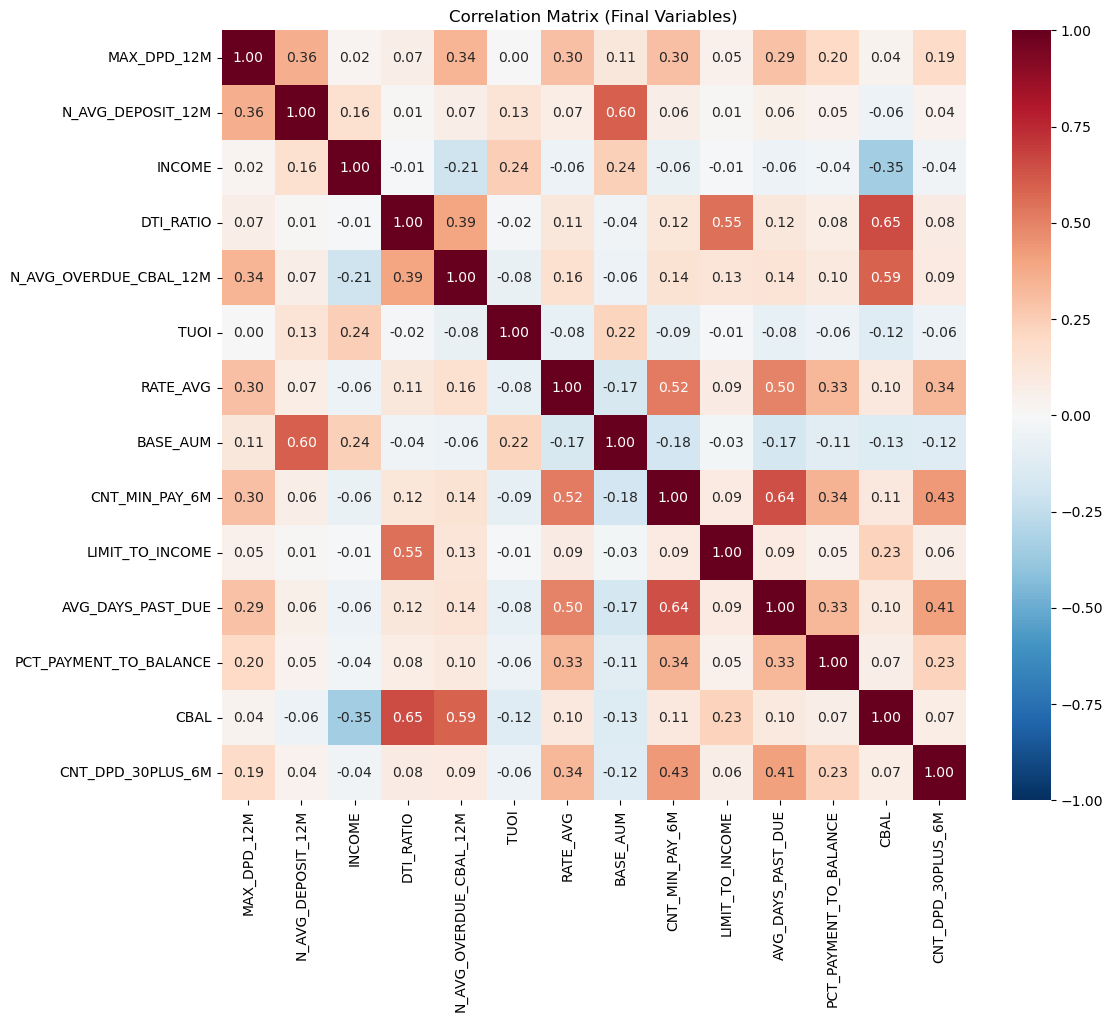

In [9]:
print("\n[BƯỚC 4] Kiểm tra tương quan và loại bỏ biến (Threshold = 0.7)...")

# --- 1. CHUẨN BỊ DANH SÁCH BIẾN ---
# Lấy danh sách các biến còn lại trong dictionary (đã được clean ở bước 3.5)
available_vars = list(binning_results.keys())

# Lấy IV để sắp xếp giảm dần
var_iv_list = []
for v in available_vars:
    iv = binning_results[v].binning_table.iv
    var_iv_list.append((v, iv))

# Sort: IV cao xếp trước
var_iv_list.sort(key=lambda x: x[1], reverse=True)
sorted_features = [x[0] for x in var_iv_list]

# --- 2. TÍNH TOÁN WOE ---
print(f"  -> Đang tính toán WoE cho {len(sorted_features)} biến...")
df_woe = pd.DataFrame()

for feature in sorted_features:
    try:
        optb = binning_results[feature]
        
        # Preprocessing (Quan trọng: phải khớp với lúc train)
        is_categorical = (optb.dtype == "categorical")
        x_raw = train[feature].copy()
        
        if is_categorical:
            x_clean = x_raw.astype(str).replace('nan', 'Missing').fillna("Missing")
        else:
            x_clean = x_raw # Numerical
            
        # Transform sang WoE
        df_woe[feature] = optb.transform(x_clean, metric="woe")
        
    except Exception as e:
        print(f"  -> Lỗi transform biến {feature}: {e}")

# --- 3. TÍNH MA TRẬN TƯƠNG QUAN & LỌC ---
corr_matrix = df_woe.corr(method='pearson')

kept_vars = []
dropped_log = []

print(f"  -> Bắt đầu lọc tương quan...")

for candidate in sorted_features:
    is_kept = True
    reason = "Initial"
    
    # So sánh biến ứng viên với các biến ĐÃ ĐƯỢC GIỮ
    for existing_var in kept_vars:
        # Lấy hệ số tương quan
        r = corr_matrix.loc[candidate, existing_var]
        
        # Nếu tương quan quá cao (>= 0.7)
        if abs(r) >= 0.7:
            is_kept = False
            reason = f"Corr với {existing_var} (r={r:.2f})"
            break # Dừng kiểm tra, loại luôn
            
    if is_kept:
        kept_vars.append(candidate)
    else:
        # Lưu log
        candidate_iv = binning_results[candidate].binning_table.iv
        dropped_log.append({
            "Variable": candidate,
            "IV": candidate_iv,
            "Reason": reason
        })

# ============================================================
# HIỂN THỊ KẾT QUẢ
# ============================================================
print(f"\n=== KẾT QUẢ SAU KHI LỌC ĐA CỘNG TUYẾN ===")
print(f"Tổng biến đầu vào: {len(sorted_features)}")
print(f"Số biến giữ lại:   {len(kept_vars)}")
print(f"Số biến bị loại:   {len(dropped_log)}")

# 1. Danh sách bị loại
if dropped_log:
    print("\n>>> DANH SÁCH BIẾN BỊ LOẠI (CORRELATION > 0.7):")
    df_dropped = pd.DataFrame(dropped_log)
    display(df_dropped.style.format({"IV": "{:.4f}"}))

# 2. Danh sách giữ lại
print("\n>>> DANH SÁCH BIẾN CUỐI CÙNG (FINAL SELECTION):")

# Tạo bảng tổng hợp thông tin cho các biến được giữ
final_summary_data = []
for v in kept_vars:
    optb = binning_results[v]
    
    # Lấy thông tin binning để hiển thị cho đẹp
    bt = optb.binning_table.build()
    bt_clean = bt[bt['Bin'].astype(str) != 'Totals']
    valid_bins = bt_clean[bt_clean['Count'] > 0]
    
    final_summary_data.append({
        "Variable": v,
        "IV": optb.binning_table.iv,
        "Min_Bin_Pct": valid_bins['Count (%)'].min() if not valid_bins.empty else 0,
        "Max_Bin_Pct": valid_bins['Count (%)'].max() if not valid_bins.empty else 0
    })

df_final = pd.DataFrame(final_summary_data)
# Sort lại theo IV giảm dần để dễ nhìn
df_final = df_final.sort_values("IV", ascending=False).reset_index(drop=True)

display(df_final.style.format({
    "IV": "{:.4f}",
    "Min_Bin_Pct": "{:.2%}",
    "Max_Bin_Pct": "{:.2%}"
}))

# 3. Vẽ Heatmap (Chỉ vẽ nếu số lượng biến <= 30 để nhìn cho rõ)
if len(kept_vars) <= 30:
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_woe[kept_vars].corr(), annot=True, fmt=".2f", cmap="RdBu_r", vmin=-1, vmax=1)
    plt.title("Correlation Matrix (Final Variables)")
    plt.show()

In [10]:
def transform_to_woe(df, binning_dict, features):
    df_woe = pd.DataFrame(index=df.index)
    for col in features:
        optb = binning_dict[col]
        x_raw = df[col].astype(str).replace("nan", "Missing").fillna("Missing") \
                if optb.dtype == "categorical" else df[col]

        df_woe[col] = optb.transform(x_raw, metric="woe")
    return df_woe

X_train_woe = transform_to_woe(train, binning_results, kept_vars)
X_oos_woe   = transform_to_woe(oos,   binning_results, kept_vars)
X_oot_woe   = transform_to_woe(oot,   binning_results, kept_vars)

X_train_full_woe = X_train_woe.copy() 

LASSO REGRESSION 

In [11]:
# ============================================================
# CẤU HÌNH TOÀN CỤC (CHỈNH 1 LẦN Ở ĐÂY)
# ============================================================
TARGET_LASSO_VARS = 15      # Số lượng biến giữ lại sau Lasso
BRUTE_FORCE_K_MIN = 8       # Số biến tối thiểu trong mô hình final
BRUTE_FORCE_K_MAX = 15      # Số biến tối đa
N_JOBS            = 5      # Số luồng CPU chạy song song
TARGET_COL        = target_col # Tên biến target (đã define ở đầu notebook)

# ============================================================
# BƯỚC 5: LỌC BIẾN BẰNG LASSO (PHIÊN BẢN SILENT)
# ============================================================
print(f"\n[BƯỚC 5] Chạy Lasso Regression (Giữ lại Top {TARGET_LASSO_VARS} biến)...")

lr_lasso = LogisticRegression(
    penalty='l1',
    C=1.0,
    solver='liblinear',
    random_state=42
)

lr_lasso.fit(X_train_full_woe, y_train_full)

# Lấy độ quan trọng theo trị tuyệt đối hệ số
coefs_abs = np.abs(lr_lasso.coef_[0])
df_imp = pd.DataFrame({
    'Variable': kept_vars,
    'Imp': coefs_abs
}).sort_values('Imp', ascending=False)

final_vars_lasso = df_imp.head(TARGET_LASSO_VARS)['Variable'].tolist()

kept_vars = final_vars_lasso
print(f"  -> {len(kept_vars)} biến sau LASSO: {kept_vars}")
std_devs = X_train_full_woe[kept_vars].std()


[BƯỚC 5] Chạy Lasso Regression (Giữ lại Top 15 biến)...
  -> 14 biến sau LASSO: ['INCOME', 'MAX_DPD_12M', 'TUOI', 'DTI_RATIO', 'CBAL', 'N_AVG_OVERDUE_CBAL_12M', 'N_AVG_DEPOSIT_12M', 'LIMIT_TO_INCOME', 'PCT_PAYMENT_TO_BALANCE', 'CNT_DPD_30PLUS_6M', 'RATE_AVG', 'CNT_MIN_PAY_6M', 'AVG_DAYS_PAST_DUE', 'BASE_AUM']


In [12]:
# ============================================================
# BƯỚC 7: BRUTE-FORCE OPTIMIZED
# ============================================================
print(f"\n[BƯỚC 7] Chạy Brute-force ({BRUTE_FORCE_K_MIN}-{BRUTE_FORCE_K_MAX} biến) trên {N_JOBS} luồng CPU...")

# Worker Function
def process_combo(cols_idx, feature_names, X_data, y_data, stds):
    vars_names = feature_names[list(cols_idx)]
    vars_names = [v for v in vars_names if v in X_data.columns]   # thêm
    if len(vars_names) == 0:
        return None
    
    X_sub = X_data[vars_names]

    clf = LogisticRegression(
        penalty='l2',
        C=1e9,
        solver='liblinear',
        random_state=42
    )
    clf.fit(X_sub, y_data)

    coefs = clf.coef_[0]

    # Rule 1: Sign must be negative
    if np.any(coefs >= 0):
        return None

    # Rule 2: Weight constraint
    imp = np.abs(coefs * stds[vars_names].values)
    total = imp.sum()
    if total == 0:
        return None
    w = (imp / total) * 100
    if np.any((w < 3) | (w > 35)):
        return None

    # Rule 3: Gini
    pred = clf.predict_proba(X_sub)[:, 1]
    gini = 2 * roc_auc_score(y_data, pred) - 1
    if gini < 0.4:
        return None

    return (len(vars_names), list(vars_names), coefs, w, gini)

# Main Loop
feature_names_arr = np.array(kept_vars)
combos = []

for k in range(BRUTE_FORCE_K_MIN, BRUTE_FORCE_K_MAX + 1):
    combos.extend(itertools.combinations(range(len(kept_vars)), k))

print(f"  -> Tổng số mô hình cần kiểm tra: {len(combos)}")
print("  -> Đang xử lý (vui lòng chờ)...")

# Chạy song song 
results = Parallel(n_jobs=N_JOBS, verbose=1)(
    delayed(process_combo)(c, feature_names_arr, X_train_full_woe, y_train_full, std_devs)
    for c in combos
)

valid_models = [r for r in results if r is not None]
print(f" -> Số mô hình đạt chuẩn: {len(valid_models)}")


[BƯỚC 7] Chạy Brute-force (8-15 biến) trên 5 luồng CPU...
  -> Tổng số mô hình cần kiểm tra: 6476
  -> Đang xử lý (vui lòng chờ)...


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.4min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  3.3min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:  5.9min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:  9.2min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed: 13.2min
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed: 18.0min
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed: 22.2min
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed: 27.6min
[Parallel(n_jobs=5)]: Done 4990 tasks      | elapsed: 35.6min
[Parallel(n_jobs=5)]: Done 6040 tasks      | elapsed: 45.3min


 -> Số mô hình đạt chuẩn: 129


[Parallel(n_jobs=5)]: Done 6476 out of 6476 | elapsed: 49.8min finished


In [13]:
# ============================================================
# BƯỚC 8: LỌC TOP 10 MÔ HÌNH ỔN ĐỊNH NHẤT
# ============================================================

X_train_final = X_train_full_woe
X_oos_final = X_oos_woe
X_oot_final = X_oot_woe

print("\n[BƯỚC 8] Đánh giá toàn bộ model hợp lệ trên Train / OOS / OOT...")

model_records = []

for idx, (num_vars, vars_list, coefs, weights, gini_train_bruteforce) in enumerate(valid_models):

    # 1. Fit Statsmodels Logit
    X_train_best = sm.add_constant(X_train_final[vars_list])
    model_sm = sm.Logit(y_train_full, X_train_best).fit(disp=0)

    # 2. Predict Train
    pred_train = model_sm.predict(X_train_best)
    g_train = 2 * roc_auc_score(y_train_full, pred_train) - 1

    # 3. Predict OOS
    X_oos_best = sm.add_constant(X_oos_final[vars_list])
    pred_oos = model_sm.predict(X_oos_best)
    g_oos = 2 * roc_auc_score(oos[TARGET_COL], pred_oos) - 1

    # 4. Predict OOT
    X_oot_best = sm.add_constant(X_oot_final[vars_list])
    pred_oot = model_sm.predict(X_oot_best)
    g_oot = 2 * roc_auc_score(oot[TARGET_COL], pred_oot) - 1

    # 5. Stability score (chênh lệch càng nhỏ càng tốt)
    stab_oos = abs(g_train - g_oos)
    stab_oot = abs(g_train - g_oot)
    stab_total = stab_oos + stab_oot    # tổng độ chênh

    # 6. Lưu kết quả
    model_records.append({
        "Vars": vars_list,
        "Num_Vars": num_vars,
        "Gini_Train": g_train,
        "Gini_OOS": g_oos,
        "Gini_OOT": g_oot,
        "Stability": stab_total,
        "Weights": weights,
        "SM_Model": model_sm
    })

# ============================================================
# SẮP XẾP MODEL THEO TIÊU CHÍ:
# 1. Gini OOS giảm dần
# 2. Stability tăng dần (ổn định hơn)
# ============================================================

df_models = pd.DataFrame(model_records)

df_models_sorted = df_models.sort_values(
    by=["Gini_OOS", "Stability"],
    ascending=[False, True]
).reset_index(drop=True)

# Lấy top 10
top10 = df_models_sorted.head(10)

print("\n>>> TOP 10 MODEL TỐT NHẤT (SẮP XẾP THEO GINI OOS & STABILITY)")
display(top10[["Num_Vars", "Vars", "Gini_Train", "Gini_OOS", "Gini_OOT", "Stability"]]
        .style.format({
            "Gini_Train": "{:.2%}",
            "Gini_OOS": "{:.2%}",
            "Gini_OOT": "{:.2%}",
            "Stability": "{:.4f}"
        }))

# ============================================================
# IN RA DANH SÁCH BIẾN CỦA 10 MODEL
# ============================================================

print("\n>>> DANH SÁCH BIẾN CỦA TOP 10 MÔ HÌNH")
for i, row in top10.iterrows():
    print(f"\n--- Model #{i+1} ({row['Num_Vars']} biến) ---")
    print(row["Vars"])


[BƯỚC 8] Đánh giá toàn bộ model hợp lệ trên Train / OOS / OOT...

>>> TOP 10 MODEL TỐT NHẤT (SẮP XẾP THEO GINI OOS & STABILITY)


,Num_Vars,Vars,Gini_Train,Gini_OOS,Gini_OOT,Stability
0,8,"[np.str_('INCOME'), np.str_('TUOI'), np.str_('DTI_RATIO'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('RATE_AVG'), np.str_('CNT_MIN_PAY_6M'), np.str_('AVG_DAYS_PAST_DUE')]",45.12%,45.61%,44.68%,0.0093
1,8,"[np.str_('INCOME'), np.str_('TUOI'), np.str_('DTI_RATIO'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('RATE_AVG'), np.str_('CNT_MIN_PAY_6M')]",45.09%,45.55%,44.59%,0.0096
2,8,"[np.str_('INCOME'), np.str_('TUOI'), np.str_('DTI_RATIO'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('RATE_AVG'), np.str_('AVG_DAYS_PAST_DUE')]",45.03%,45.51%,44.59%,0.0092
3,8,"[np.str_('INCOME'), np.str_('TUOI'), np.str_('DTI_RATIO'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('CNT_MIN_PAY_6M'), np.str_('AVG_DAYS_PAST_DUE')]",44.88%,45.36%,44.33%,0.0104
4,9,"[np.str_('INCOME'), np.str_('TUOI'), np.str_('CBAL'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('LIMIT_TO_INCOME'), np.str_('RATE_AVG'), np.str_('CNT_MIN_PAY_6M'), np.str_('AVG_DAYS_PAST_DUE')]",44.57%,45.17%,44.49%,0.0068
5,8,"[np.str_('INCOME'), np.str_('TUOI'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('LIMIT_TO_INCOME'), np.str_('RATE_AVG'), np.str_('CNT_MIN_PAY_6M'), np.str_('AVG_DAYS_PAST_DUE')]",44.49%,45.13%,44.50%,0.0064
6,9,"[np.str_('INCOME'), np.str_('TUOI'), np.str_('CBAL'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('LIMIT_TO_INCOME'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('RATE_AVG'), np.str_('CNT_MIN_PAY_6M')]",44.53%,45.10%,44.39%,0.0072
7,9,"[np.str_('INCOME'), np.str_('TUOI'), np.str_('CBAL'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('LIMIT_TO_INCOME'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('RATE_AVG'), np.str_('AVG_DAYS_PAST_DUE')]",44.47%,45.06%,44.39%,0.0068
8,8,"[np.str_('INCOME'), np.str_('TUOI'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('LIMIT_TO_INCOME'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('RATE_AVG'), np.str_('CNT_MIN_PAY_6M')]",44.46%,45.06%,44.39%,0.0067
9,8,"[np.str_('INCOME'), np.str_('TUOI'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('LIMIT_TO_INCOME'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('RATE_AVG'), np.str_('AVG_DAYS_PAST_DUE')]",44.39%,45.02%,44.38%,0.0064



>>> DANH SÁCH BIẾN CỦA TOP 10 MÔ HÌNH

--- Model #1 (8 biến) ---
[np.str_('INCOME'), np.str_('TUOI'), np.str_('DTI_RATIO'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('RATE_AVG'), np.str_('CNT_MIN_PAY_6M'), np.str_('AVG_DAYS_PAST_DUE')]

--- Model #2 (8 biến) ---
[np.str_('INCOME'), np.str_('TUOI'), np.str_('DTI_RATIO'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('RATE_AVG'), np.str_('CNT_MIN_PAY_6M')]

--- Model #3 (8 biến) ---
[np.str_('INCOME'), np.str_('TUOI'), np.str_('DTI_RATIO'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('RATE_AVG'), np.str_('AVG_DAYS_PAST_DUE')]

--- Model #4 (8 biến) ---
[np.str_('INCOME'), np.str_('TUOI'), np.str_('DTI_RATIO'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('CNT_MIN_PAY_6M'), np.str_('AVG_DAYS_PAST_DUE')]

--- Model #5 (9 b

In [14]:
best = top10.iloc[9]
best_vars = best["Vars"]

# Model RAW đã fit bằng statsmodels → đây là model final
model_sm = best["SM_Model"]

In [15]:
# ============================================================
# BƯỚC 9 – PLATT SCALING (CALIBRATION MODULE)
# ============================================================

print("\n[BƯỚC 9] Chạy Platt Scaling (calibrate PD)...")

# 1. Lấy logit_raw từ model RAW
logit_train = model_sm.predict(sm.add_constant(X_train_final[best_vars]), linear=True)
logit_oos   = model_sm.predict(sm.add_constant(X_oos_final[best_vars]), linear=True)
logit_oot   = model_sm.predict(sm.add_constant(X_oot_final[best_vars]), linear=True)

# 2. Fit Platt model trên TRAIN
model_platt = LogisticRegression(solver="lbfgs")
model_platt.fit(logit_train.values.reshape(-1, 1), y_train_full)

# 3. Predict PD đã calibrate
pd_train = model_platt.predict_proba(logit_train.values.reshape(-1,1))[:,1]
pd_oos   = model_platt.predict_proba(logit_oos.values.reshape(-1,1))[:,1]
pd_oot   = model_platt.predict_proba(logit_oot.values.reshape(-1,1))[:,1]

print(" -> Hoàn tất Platt Scaling!")


[BƯỚC 9] Chạy Platt Scaling (calibrate PD)...
 -> Hoàn tất Platt Scaling!


In [16]:
# ============================================================
# BƯỚC CUỐI SEGMENT – EXPORT PD CALIBRATED
# ============================================================

print("\n[EXPORT] Xuất file PD calibrated cho segment...")

segment_name = 'seg3'

# Tạo ROW_ID cho từng dataset
train_exp = train.reset_index(drop=False).rename(columns={"index": "ROW_ID"})
oos_exp   = oos.reset_index(drop=False).rename(columns={"index": "ROW_ID"})
oot_exp   = oot.reset_index(drop=False).rename(columns={"index": "ROW_ID"})

# Tạo dataframe cho từng tập
df_train_exp = pd.DataFrame({
    "ROW_ID": train_exp["ROW_ID"],
    "SEGMENT": segment_name,
    "DATA_TYPE": "TRAIN",
    "y": y_train_full,
    "PD": pd_train
})

df_oos_exp = pd.DataFrame({
    "ROW_ID": oos_exp["ROW_ID"],
    "SEGMENT": segment_name,
    "DATA_TYPE": "OOS",
    "y": oos[TARGET_COL],
    "PD": pd_oos
})

df_oot_exp = pd.DataFrame({
    "ROW_ID": oot_exp["ROW_ID"],
    "SEGMENT": segment_name,
    "DATA_TYPE": "OOT",
    "y": oot[TARGET_COL],
    "PD": pd_oot
})

# GHÉP 3 TẬP LẠI
df_export = pd.concat([df_train_exp, df_oos_exp, df_oot_exp], ignore_index=True)

# Xuất file
output_file = f"{segment_name}_pd_calibrated.parquet"
df_export.to_parquet(output_file, index=False)

print(f"✔ Đã xuất file chuẩn: {output_file}")
print(df_export.head())


[EXPORT] Xuất file PD calibrated cho segment...
✔ Đã xuất file chuẩn: seg3_pd_calibrated.parquet
   ROW_ID SEGMENT DATA_TYPE  y        PD
0       0    seg3     TRAIN  1  0.142171
1       1    seg3     TRAIN  0  0.084659
2       2    seg3     TRAIN  0  0.305467
3       3    seg3     TRAIN  0  0.286319
4       4    seg3     TRAIN  0  0.098868
